## Algorithms





*   **Decision Tree**:
  *   **Advantages**: Speed is fast and it's easy to understand classification rules. It can handle continuous and category features and do not need any domain knowledge and parameter assumptions. It's suitable for high-dimensional data.
  *   **Disadvantages**: For data with imbalanced sample size in each category, the information gain is biased towards those features with larger sample size. It is easy to overfit and ignores correlations between features.
*   Neural Network:
  *   **Advantages**: The main advantage of neural networks is that they can outperform almost all other machine learning algorithms.
  *   **Disadvantages**: the famous "black box" problem, time consuming, energy consuming.
*   Boosting: 
  *   **Advantages**: Boosting samples based on error rates, so Boosting generally has a better classification accuracy than Bagging. In particular, for classifiers like XGBoost, model performance has been greatly improved through the use of a variety of techniques, including regularization, allowing it to perform well in a wide range of classification tasks.
  *   **Disadvantages**: Sensitive to outliers, outliers will get higher weight.
*   Support Vector Machine:
  *   **Advantages**:
     *  It is supported by strict mathematical theory and does not rely on statistical methods, thus simplifying classification and regression problems.
     *  Ability to identify key samples that are critical to the task (i.e., support vectors).
     *  With the kernel technique, nonlinear classification/regression tasks can be handled.
     *  The final decision function is only determined by a few support vectors, and the complexity of calculation depends on the number of support vectors rather than the dimension of the sample space, which avoids "dimension disaster" in a sense.
  *   **Disadvantages**:   
     *  Long training time.
     *  When the kernel technique is used, the space complexity is high if the kernel matrix needs to be stored.
     *  In model prediction, the prediction time is proportional to the number of support vectors. When the number of support vectors is large, the computational complexity of prediction is high.
*   K-Nearest Neighbors:
  * **Advantages**: easy, insensitive to outliers.
  * **Disadvantages**: Lazy algorithm with high time complexity. Depending on sample balance, when there is sample imbalance, there will be deviation in classification. The higher the dimension of the vector, the weaker the distinguishing ability of Euclidean distance. Not suitable for data with too large sample space.



## Diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import minmax_scale
import warnings 
warnings.filterwarnings("ignore") 
np.random.seed(52)

###  EDA

In [3]:
diabetes_data = pd.read_csv('./diabetes_data.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               569 non-null    int64  
 1   Glucose                   569 non-null    int64  
 2   BloodPressure             569 non-null    int64  
 3   SkinThickness             569 non-null    int64  
 4   Insulin                   569 non-null    int64  
 5   BMI                       569 non-null    float64
 6   DiabetesPedigreeFunction  569 non-null    float64
 7   Age                       569 non-null    int64  
 8   Outcome                   569 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.1 KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.83304,120.115993,68.810193,20.564148,79.602812,31.899121,0.481376,33.268893,0.346221
std,3.35650,32.722971,19.322208,15.637166,115.864374,8.069130,0.336753,11.803397,0.476183
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.00000,99.000000,64.000000,0.000000,0.000000,27.100000,0.249000,24.000000,0.000000
50%,3.00000,116.000000,70.000000,23.000000,38.000000,32.000000,0.385000,29.000000,0.000000
75%,6.00000,140.000000,80.000000,32.000000,122.000000,36.600000,0.645000,40.000000,1.000000
max,17.00000,198.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].median(),inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].median(),inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(),inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(),inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(),inplace=True)

In [10]:
print(diabetes_data.groupby('Outcome').size())

Outcome
0    372
1    197
dtype: int64


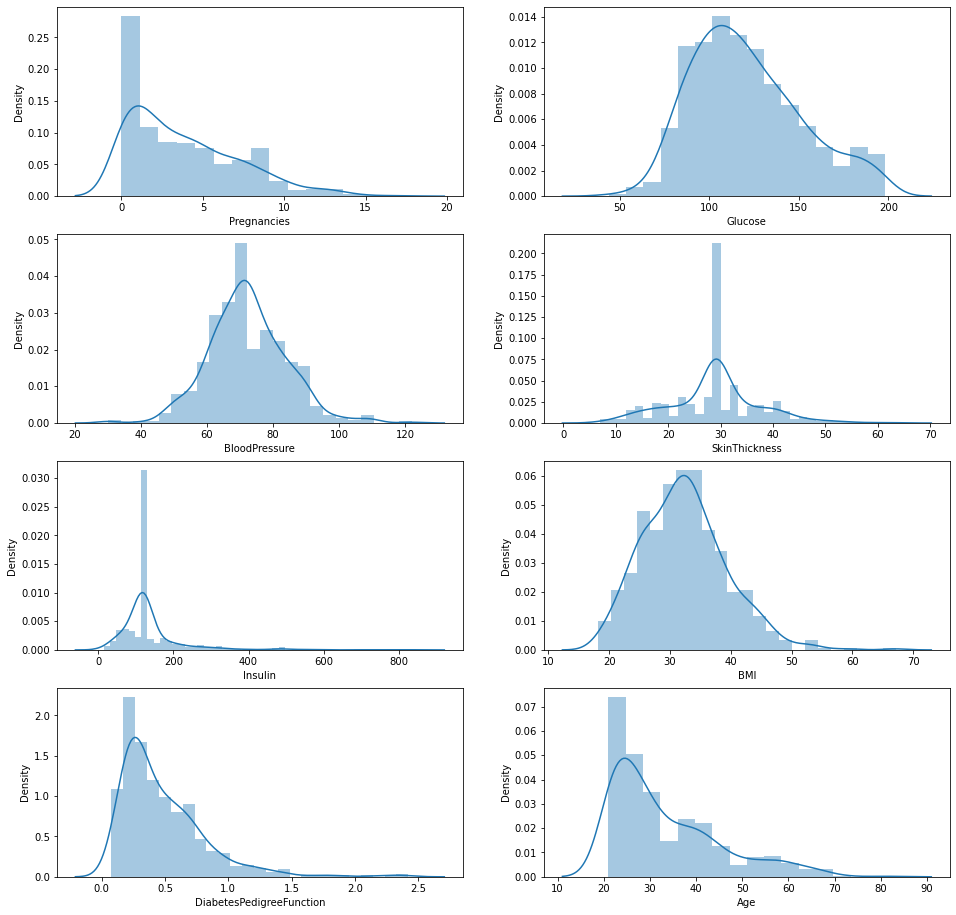

In [29]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Pregnancies'],ax=ax2[0][0])
sns.distplot(diabetes_data['Glucose'],ax=ax2[0][1])
sns.distplot(diabetes_data['BloodPressure'],ax=ax2[1][0])
sns.distplot(diabetes_data['SkinThickness'],ax=ax2[1][1])
sns.distplot(diabetes_data['Insulin'],ax=ax2[2][0])
sns.distplot(diabetes_data['BMI'],ax=ax2[2][1])
sns.distplot(diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(diabetes_data['Age'],ax=ax2[3][1])
plt.savefig('DiabetesDensity.png')
plt.show()

Glucose, Blood_pressure, SkinThickness and BMI are normally distributed.

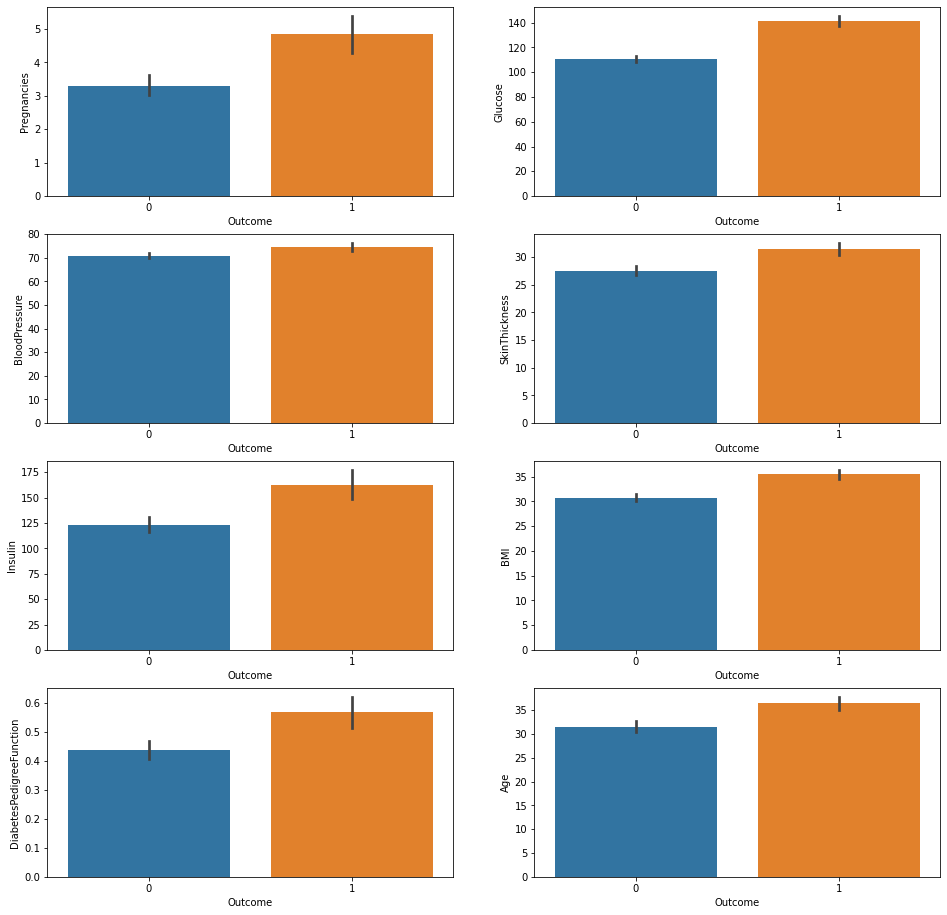

In [30]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.barplot(diabetes_data['Outcome'],diabetes_data['Pregnancies'],ax=ax2[0][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['Glucose'],ax=ax2[0][1])
sns.barplot(diabetes_data['Outcome'],diabetes_data['BloodPressure'],ax=ax2[1][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['SkinThickness'],ax=ax2[1][1])
sns.barplot(diabetes_data['Outcome'],diabetes_data['Insulin'],ax=ax2[2][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['BMI'],ax=ax2[2][1])
sns.barplot(diabetes_data['Outcome'],diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.barplot(diabetes_data['Outcome'],diabetes_data['Age'],ax=ax2[3][1])
plt.savefig('Outcome.png')
plt.show()


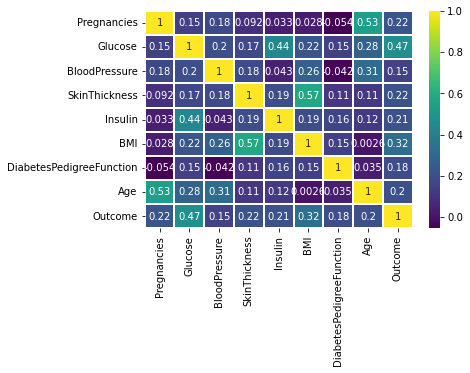

In [18]:
# check if there are any correlated values
corr = diabetes_data.corr()
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=.1)
plt.savefig('Correlate.png')
plt.show()

In [19]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.471307
BMI                         0.321731
Pregnancies                 0.221285
SkinThickness               0.216495
Insulin                     0.209833
Age                         0.202985
DiabetesPedigreeFunction    0.184557
BloodPressure               0.153585
Name: Outcome, dtype: float64

### Dataset & Models

In [20]:
# helper function
def plot_graph(title, sizes, train_scores, test_scores, xlabel='Training sizes', ylabel='Score',figsize=None):
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    fig = plt.figure(figsize=figsize)
    plt.plot(sizes, train_scores_mean, 'o-',color='r',label='Training score')
    plt.plot(sizes,test_scores_mean,'o-',color='g', label='Cross-Validation score')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='best')
    plt.show()

Scaling and spliting the dataset 

In [21]:
dataset = diabetes_data.drop(["Outcome"],axis = 1)
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = pd.DataFrame(StandardScaler().fit_transform(dataset),columns=columns)
y =diabetes_data['Outcome']

In [22]:
X_learning,X_validation,y_learning,y_validation = train_test_split(X,y,test_size=0.3,random_state=52,stratify=y)

#### Model 1: Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

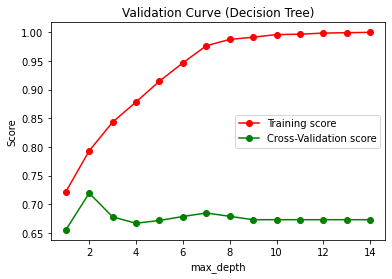

In [27]:
# Search for the optimal max_depth
train_scores = []
test_scores = []
for max_depth in range(1,15):
  results = cross_validate(DecisionTreeClassifier(max_depth=max_depth, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Decision Tree)",range(1,15),np.array(train_scores), np.array(test_scores),xlabel="max_depth")



The optimal value of max_depth was found to be 8

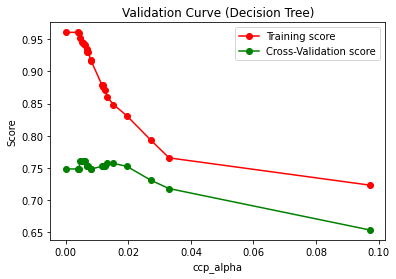

In [19]:
# Search for the optimal ccp_alpha
dt = DecisionTreeClassifier(max_depth = 8, random_state=0)
path = dt.cost_complexity_pruning_path(X_validation, y_validation)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
  results = cross_validate(DecisionTreeClassifier(max_depth=8, ccp_alpha=ccp_alpha, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Decision Tree)",ccp_alphas,np.array(train_scores), np.array(test_scores),xlabel="ccp_alpha")

In [20]:
print("The optimal ccp_alpha: ", ccp_alphas[3])

The optimal ccp_alpha:  0.004617604617604618


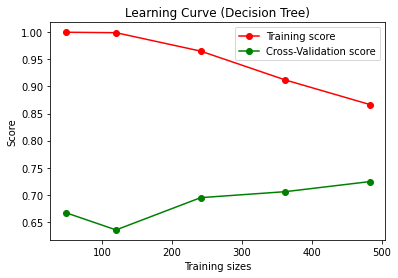

In [21]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=8, ccp_alpha=ccp_alphas[3], random_state=0),
                                                        X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (Decision Tree)", train_sizes, train_scores, test_scores)

In [22]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.7243535988819008


For Decision Tree, the cross-validation score can reach about 0.724. From above learning curves, we can see that with the increase of training size, the cross-validation score generally show an upward trend, while the training had a downward trend. This indicates that when the training size is small, the model has the problem of overfitting. In general, the effect of the decision tree model on the current data set is mediocre, perhaps because of the sample imbalance.

#### Model 2: Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier

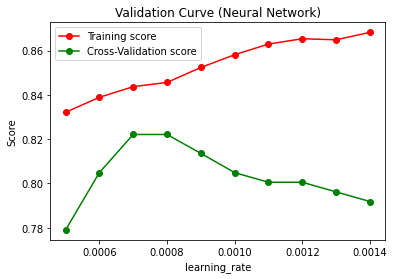

In [24]:
# Search for the optimal learning_rate
train_scores = []
test_scores = []
lrs = np.arange(0.0005,0.0015,0.0001)
for lr in lrs:
  nn = MLPClassifier(hidden_layer_sizes=(32,8,),learning_rate_init=lr, random_state=0)
  results = cross_validate(nn, X_validation, y_validation, cv=10,scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Neural Network)",lrs,np.array(train_scores), np.array(test_scores),xlabel="learning_rate")

In [25]:
mean_score = np.mean(test_scores,axis=1)
max_score = mean_score.max()
idx = np.where(mean_score == max_score)
print("The optimal learning_rate is: ", lrs[idx])

The optimal learning_rate is:  [0.0007 0.0008]


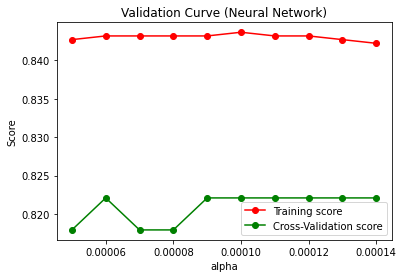

In [26]:
# Search for the optimal L2 penalty (regularization term) parameter， alpha
train_scores = []
test_scores = []
alphas = np.arange(0.00005,0.00015,0.00001)
for alpha in alphas:
  nn = MLPClassifier(hidden_layer_sizes=(32,8,),alpha=alpha, learning_rate_init=0.0007, random_state=0)
  results = cross_validate(nn, X_validation, y_validation, cv=10,scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Neural Network)",alphas,np.array(train_scores), np.array(test_scores),xlabel="alpha")

In [27]:
mean_score = np.mean(test_scores,axis=1)
max_score = mean_score.max()
idx = np.where(mean_score == max_score)
print("The optimal alpha is: ", alphas[idx])

The optimal alpha is:  [6.0e-05 9.0e-05 1.0e-04 1.1e-04 1.2e-04 1.3e-04 1.4e-04]


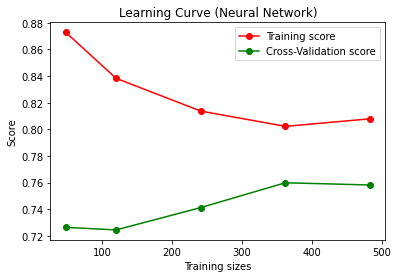

In [28]:
nn = MLPClassifier(hidden_layer_sizes=(32,8,),alpha=0.0001, learning_rate_init=0.0007, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(nn,X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (Neural Network)", train_sizes, train_scores, test_scores)

In [29]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.7598183088749126


For this two hidden layers neural network, the cross-validation score can reach about 0.76. From above learning curves, cross-validation curve had an overall upward trend with the increase of training size, and finally become stable. In general, the neural network is effective on the current dataset. 

It can be seen that more complex model didn't bring higher score. More complex models increase the risk of overfitting.

#### Model 3: Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

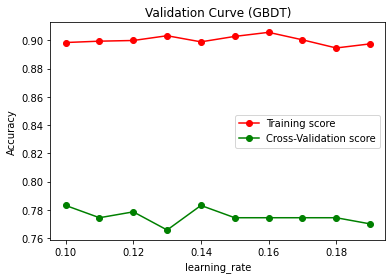

In [31]:
# A boosted version of model 1 Decision Tree
# Search for the best learning_rate
train_scores = []
test_scores = []
# Learning rate shrinks the contribution of each tree
learning_rates = np.arange(0.1,0.2,0.01)
for learning_rate in learning_rates:
  results = cross_validate(GradientBoostingClassifier(max_depth=8, ccp_alpha=ccp_alphas[3], learning_rate=learning_rate, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (GBDT)",learning_rates,np.array(train_scores), np.array(test_scores),xlabel="learning_rate", ylabel="Accuracy")

The optimal learning_rate: 0.14

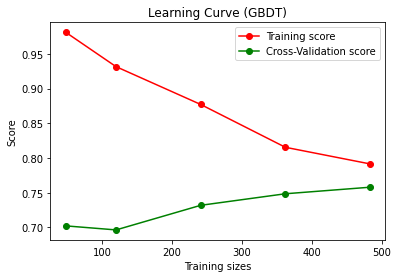

In [32]:
train_sizes, train_scores, test_scores = learning_curve(GradientBoostingClassifier(max_depth=8, ccp_alpha=ccp_alphas[3], learning_rate=0.14, random_state=0),
                                                        X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (GBDT)", train_sizes, train_scores, test_scores)

In [33]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.7579315164220825


For GBDT, the cross-validation score can reach about 0.758. In general, the trend of learning curves are similar to that of decision tree,and there is also the problem of over-fitting when the training size is small.  Because GBDT is an ensemble method, it builds an additive model in a forward stage-wise fashion. In each stage trees are fit on the negative gradient of the binomial or multinomial deviance loss function. So, it works better than a decision tree.

#### Model 4: Support Vector Machine

In [34]:
from sklearn.svm import SVC

Kernel: Linear

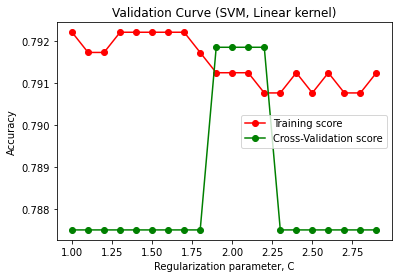

In [35]:
# Search for the best regularization parameter C
train_scores = []
test_scores = []
cs = np.arange(1,3,0.1)
for c in cs:
  results = cross_validate(SVC(kernel='linear', C=c, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (SVM, Linear kernel)",cs,np.array(train_scores), np.array(test_scores),xlabel="Regularization parameter, C", ylabel="Accuracy")

The optimal C: any value in the interval [1.7, 2.2]

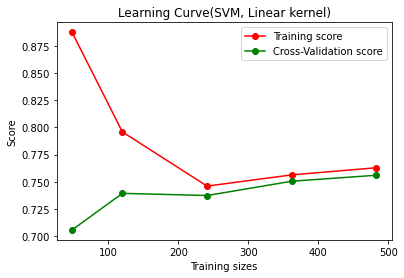

In [36]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear', C=2., random_state=0), X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve(SVM, Linear kernel)", train_sizes, train_scores, test_scores)

In [37]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.7560447239692522


Kernel: RBF

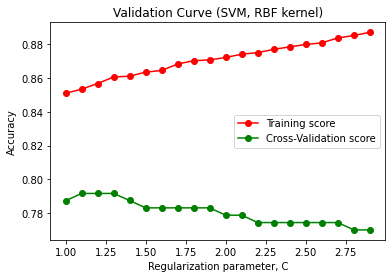

In [38]:
# Search for the best regularization parameter C
train_scores = []
test_scores = []
cs = np.arange(1,3,0.1)
for c in cs:
  results = cross_validate(SVC(kernel='rbf', C=c, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (SVM, RBF kernel)",cs,np.array(train_scores), np.array(test_scores),xlabel="Regularization parameter, C", ylabel="Accuracy")

The optimal C: 1.1 or 1.3

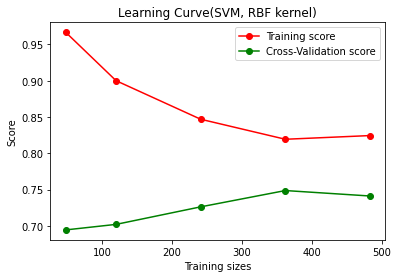

In [39]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', C=1.3, random_state=0), X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve(SVM, RBF kernel)", train_sizes, train_scores, test_scores)

In [40]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.7487421383647799


For SVM, the cross-validation score of linear kernel and RBF kernel reached about 0.756 and 0.749 respectively. Linear kernel works better for this dataset. When the training data is linearly separable, the linear kernel function is generally used. 

When the training data is linearly undivisible, it is necessary to use the kernel technique to map the training data to another high-dimensional space, in which the data is linearly separable. However, it should be noted that if the number of samples $N$ and the number of features $M$ are large and $M >> N$, a linear kernel is needed. Considering that the space dimension after Gaussian kernel RBF mapping is higher, more complex and easy to overfit, the disadvantages of using Gaussian kernel RBF are greater than the advantages, so it is better to use linear kernel. If the number of samples $N$ is not particularly large and the number of features $M$ is small, then Gaussian kernel RBF can not only achieve linear separability in high-dimensional space, but also has no great consumption in calculation. Therefore, the advantages outweigh the disadvantages and Gaussian kernel RBF is suitable. If $N$ is large but $M$ is small, it is also difficult to avoid complex problems in calculation, so linear kernel will be considered more.

#### Model 5: k-Nearest Neighbors

lazy learning

In [41]:
from sklearn.neighbors import KNeighborsClassifier

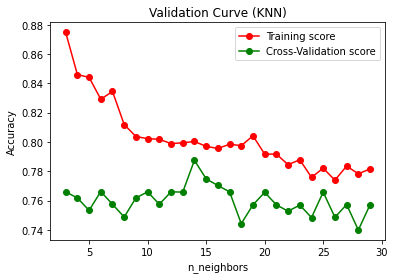

In [42]:
# Search for the best number of neighbors
train_scores = []
test_scores = []
neighbors = np.arange(3,30)
for neighbor in neighbors:
  results = cross_validate(KNeighborsClassifier(n_neighbors=neighbor), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (KNN)",neighbors,np.array(train_scores), np.array(test_scores),xlabel="n_neighbors", ylabel="Accuracy")

The optimal n_neighbors: 14.

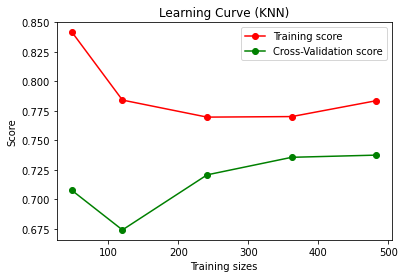

In [43]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=14),
                                                        X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (KNN)", train_sizes, train_scores, test_scores)

In [44]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.7374912648497555


For KNN, the cross-validation score can reach about 0.737, higher than the decision tree, but lower than the other three models, the effect is not particularly ideal. It may also be affected by the sample imbalance. 

## Customer relationship marketing

### EDA

In [45]:
crm = pd.read_csv("./Customer relationship marketing.csv")
crm.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car


In [46]:
crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9134 non-null   object 
 1   Customer Lifetime Value    9134 non-null   float64
 2   Response                   9134 non-null   object 
 3   Coverage                   9134 non-null   object 
 4   Education                  9134 non-null   object 
 5   Effective To Date          9134 non-null   object 
 6   EmploymentStatus           9134 non-null   object 
 7   Gender                     9134 non-null   object 
 8   Income                     9134 non-null   int64  
 9   Location Code              9134 non-null   object 
 10  Marital Status             9134 non-null   object 
 11  Monthly Premium Auto       9134 non-null   int64  
 12  Months Since Last Claim    9134 non-null   int64  
 13  Number of Open Complaints  9134 non-null   int64

In [47]:
# Check the distribution of each variable.
crm.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,5.000000,9.000000,2893.239678


In [48]:
print(crm.groupby('Response').size())

Response
No     7826
Yes    1308
dtype: int64


In [49]:
# Dealing with Missing Values
crm.isnull().sum()

State                        0
Customer Lifetime Value      0
Response                     0
Coverage                     0
Education                    0
Effective To Date            0
EmploymentStatus             0
Gender                       0
Income                       0
Location Code                0
Marital Status               0
Monthly Premium Auto         0
Months Since Last Claim      0
Number of Open Complaints    0
Number of Policies           0
Policy                       0
Renew Offer Type             0
Sales Channel                0
Total Claim Amount           0
Vehicle Class                0
dtype: int64

In [50]:
# Dealing with categorical values
# One-hot encoding is used here.
# In this dataset, categorical variables include "State", "Coverage", "Education", "EmploymentStatus", "Gender", "Location Code","Marital Status","Policy","Renew Offer Type","Sales Channel" and "Vehicle Class".
attrs_cat = ["State", "Coverage", "Education", "EmploymentStatus", "Gender", "Location Code","Marital Status","Policy","Renew Offer Type","Sales Channel", "Vehicle Class"]
for attr in attrs_cat:
    print("----"+attr+"----")
    print(crm[attr].value_counts())

----State----
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
----Coverage----
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
----Education----
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
----EmploymentStatus----
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64
----Gender----
F    4658
M    4476
Name: Gender, dtype: int64
----Location Code----
Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64
----Marital Status----
Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64
----Policy----
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corpo

In [51]:
# Create dummy columns
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummies], axis=1)
    return df

In [52]:
crmCp = crm.copy()
for attr in attrs_cat:
    crmCp = create_dummies(crmCp,attr)

In [53]:
crmCp.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [54]:
# To normalizing data, we convert the numerical data to a scale where the maximum value is 1 and the minimum value is 0.
attrs_num = ["Customer Lifetime Value","Income","Monthly Premium Auto","Months Since Last Claim","Number of Open Complaints","Number of Policies","Total Claim Amount"]
for attr in attrs_num:
    crmCp[attr+"_scaled"] = minmax_scale(crmCp[attr])

In [55]:
crmCp.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Customer Lifetime Value_scaled,Income_scaled,Monthly Premium Auto_scaled,Months Since Last Claim_scaled,Number of Open Complaints_scaled,Number of Policies_scaled,Total Claim Amount_scaled
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.010629,0.562847,0.033755,0.914286,0.0,0.000,0.132974
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0.062406,0.000000,0.139241,0.371429,0.0,0.875,0.391051
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.134960,0.487763,0.198312,0.514286,0.0,0.125,0.195764
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.070589,0.000000,0.189873,0.514286,0.0,0.750,0.183117
4,Washington,2813.692575,No,Basic,Bachelor,2/03/2011,Employed,M,43836,Rural,Single,73,12,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.011245,0.438443,0.050633,0.342857,0.0,0.000,0.047710


In [56]:
# Clean up the data and partition it
columns_to_drop = ["Effective To Date"]

for col in crm.columns:
    if (col in attrs_cat) or (col in attrs_num):
        columns_to_drop.append(col)
        
crmCp = crmCp.drop(columns_to_drop,axis=1)

In [57]:
crmCp.loc[crmCp["Response"]=='Yes','Response'] = 1
crmCp.loc[crmCp["Response"]=='No','Response'] = 0

In [58]:
X = crmCp.iloc[:,1:]
y = crmCp['Response'].astype('int')

In [59]:
X_learning,X_validation,y_learning,y_validation = train_test_split(X,y,test_size=0.3,stratify=y, random_state=52)

### Models

#### Model 1: Decision Tree

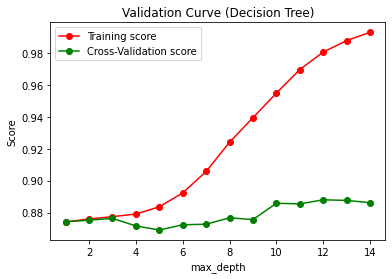

In [60]:
# Search for best max_depth
train_scores = []
test_scores = []
for max_depth in range(1,15):
  results = cross_validate(DecisionTreeClassifier(max_depth=max_depth, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Decision Tree)",range(1,15),np.array(train_scores), np.array(test_scores),xlabel="max_depth")


The optimal value of max_depth: 12

In [61]:
# Search for best ccp_alpha
dt = DecisionTreeClassifier(max_depth = 12, random_state=0)
path = dt.cost_complexity_pruning_path(X_validation, y_validation)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
  results = cross_validate(DecisionTreeClassifier(max_depth=12, ccp_alpha=ccp_alpha, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])

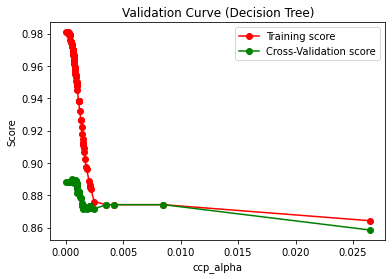

In [62]:
plot_graph("Validation Curve (Decision Tree)",ccp_alphas,np.array(train_scores), np.array(test_scores),xlabel="ccp_alpha")

In [63]:
mean_score = np.mean(test_scores,axis=1)
max_score = mean_score.max()
idx = np.where(mean_score == max_score)
print("The optimal ccp_alpha is: ", ccp_alphas[idx])

The optimal ccp_alpha is:  [0.00053997]


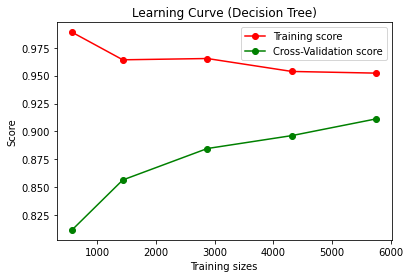

In [64]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=12, ccp_alpha=ccp_alphas[idx], random_state=0),
                                                        X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (Decision Tree)", train_sizes, train_scores, test_scores)

In [65]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.9113140649452267


For decision tree, the cross-validation score can reach about 0.911. It's much higher than the first dataset. Although this dataset is also sample imbalanced, the larger sample size gives the decision tree more opportunities to fully mine the decision rules.

#### Model 2: Neural Network

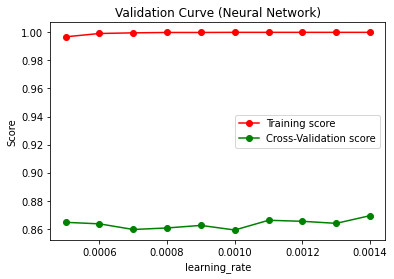

In [66]:
# Search for the optimal learning_rate
train_scores = []
test_scores = []
lrs = np.arange(0.0005,0.0015,0.0001)
for lr in lrs:
  nn = MLPClassifier(hidden_layer_sizes=(64,32,),learning_rate_init=lr, random_state=0)
  results = cross_validate(nn, X_validation, y_validation, cv=5,scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Neural Network)",lrs,np.array(train_scores), np.array(test_scores),xlabel="learning_rate")

In [67]:
mean_score = np.mean(test_scores,axis=1)
max_score = mean_score.max()
idx = np.where(mean_score == max_score)
print("The optimal learning_rate is: ", lrs[idx])

The optimal learning_rate is:  [0.0014]


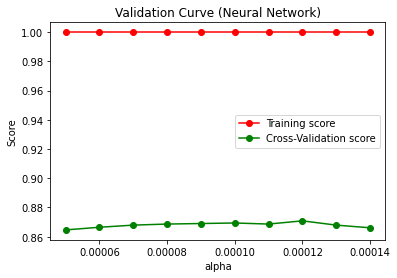

In [68]:
# Search for the optimal L2 penalty (regularization term) parameter， alpha
train_scores = []
test_scores = []
alphas = np.arange(0.00005,0.00015,0.00001)
for alpha in alphas:
  nn = MLPClassifier(hidden_layer_sizes=(64,32,),alpha=alpha, learning_rate_init=0.0014, random_state=0)
  results = cross_validate(nn, X_validation, y_validation, cv=5,scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (Neural Network)",alphas,np.array(train_scores), np.array(test_scores),xlabel="alpha")

In [69]:
mean_score = np.mean(test_scores,axis=1)
max_score = mean_score.max()
idx = np.where(mean_score == max_score)
print("The optimal alpha is: ", alphas[idx])

The optimal alpha is:  [0.00012]


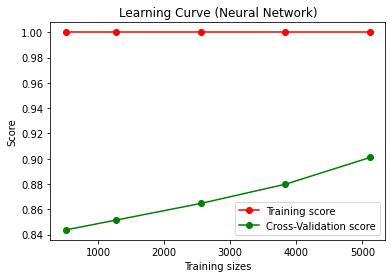

In [70]:
nn = MLPClassifier(hidden_layer_sizes=(64,32,),alpha=0.00012, learning_rate_init=0.0014, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(nn,X_learning, y_learning, cv=5,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (Neural Network)", train_sizes, train_scores, test_scores)

In [71]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.9009874204832853


For neural network, the cross-validation score on this dataset is also high, about 0.901. It works better.

#### Model 3: Boosting

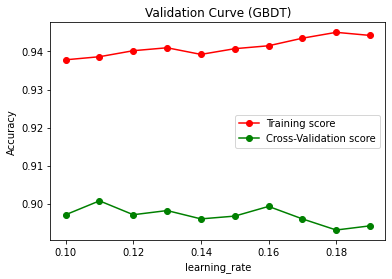

In [72]:
# A boosted version of model 1 Decision Tree
# Search for the best learning_rate
# Time Consuming....
train_scores = []
test_scores = []
# Learning rate shrinks the contribution of each tree
learning_rates = np.arange(0.1,0.2,0.01)
for learning_rate in learning_rates:
  results = cross_validate(GradientBoostingClassifier(max_depth=12, ccp_alpha=ccp_alphas[idx], learning_rate=learning_rate, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (GBDT)",learning_rates,np.array(train_scores), np.array(test_scores),xlabel="learning_rate", ylabel="Accuracy")

The optimal learning_rate: 0.11

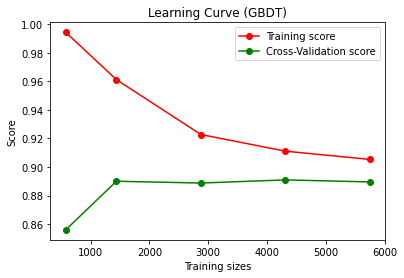

In [73]:
train_sizes, train_scores, test_scores = learning_curve(GradientBoostingClassifier(max_depth=12, ccp_alpha=ccp_alphas[idx], learning_rate=0.11, random_state=0),
                                                        X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (GBDT)", train_sizes, train_scores, test_scores)

In [74]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.8909778462441313


For this dataset, the cross-validation score of GBDT reached about 0.891, which is not high. Beacuse it is sensitive to outliers, I think it was influenced by these samples.

#### Model 4: Support Vector Machine

Kernel: Linear

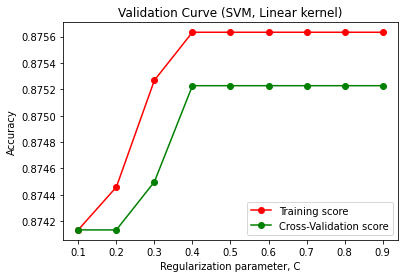

In [75]:
# Search for the best regularization parameter C
train_scores = []
test_scores = []
cs = np.arange(0,1,0.1)
for c in cs:
  results = cross_validate(SVC(kernel='linear', C=c, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (SVM, Linear kernel)",cs,np.array(train_scores), np.array(test_scores),xlabel="Regularization parameter, C", ylabel="Accuracy")

The optimal C: any value in the interval [0.4, 1)

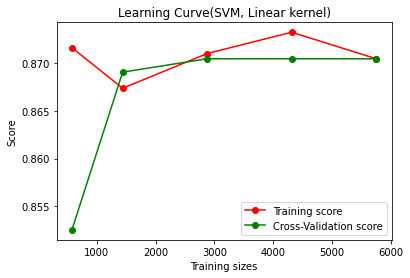

In [76]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear', C=1, random_state=0), X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve(SVM, Linear kernel)", train_sizes, train_scores, test_scores)

In [77]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.8704858665884194


Kernel: RBF

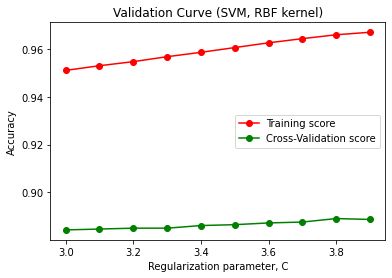

In [78]:
# Search for the best regularization parameter C
train_scores = []
test_scores = []
cs = np.arange(3,4,0.1)
for c in cs:
  results = cross_validate(SVC(kernel='rbf', C=c, random_state=0), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (SVM, RBF kernel)",cs,np.array(train_scores), np.array(test_scores),xlabel="Regularization parameter, C", ylabel="Accuracy")

The optimal C: 3.8

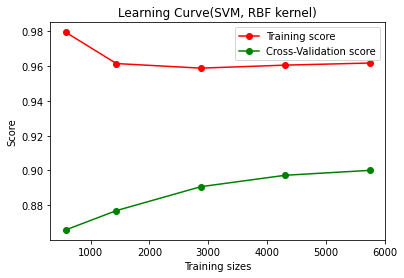

In [79]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', C=3.8, random_state=0), X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve(SVM, RBF kernel)", train_sizes, train_scores, test_scores)

In [80]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.9000489045383413


For this dataset, the cross-validation score of linear kernel and RBF kernel reached about 0.87 and 0.90 respectively. This time, RBF kernel works better than linear kernel, but it takes more time to compute.

#### Model 5: k-Nearest Neighbors

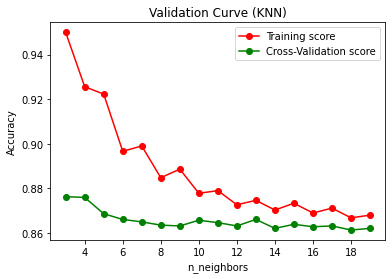

In [81]:
# Search for the best number of neighbors
train_scores = []
test_scores = []
neighbors = np.arange(3,20)
for neighbor in neighbors:
  results = cross_validate(KNeighborsClassifier(n_neighbors=neighbor), 
                 X_validation, y_validation, cv=10,
                 scoring='accuracy',return_train_score=True)
  train_scores.append(results['train_score'])
  test_scores.append(results['test_score'])
plot_graph("Validation Curve (KNN)",neighbors,np.array(train_scores), np.array(test_scores),xlabel="n_neighbors", ylabel="Accuracy")

The optimal n_neighbors: 4.

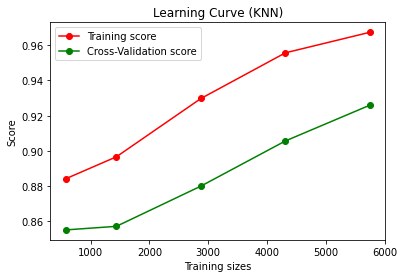

In [82]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=4),
                                                        X_learning, y_learning, cv=10,train_sizes=[0.1,0.25,0.5,0.75,1])
plot_graph("Learning Curve (KNN)", train_sizes, train_scores, test_scores)

In [83]:
print("The best score: ", np.mean(test_scores,axis=1).max())

The best score:  0.926015747261346


For this dataset, cross-validation score of KNN is the highest, reaching 0.926. The larger sample size of the current dataset and clearer classification boundaries give the KNN model a chance to play its full role.

For this dataset, all five models performed better than the first dataset. The reason may be that although the current dataset still has the problem of sample imbalance, the large sample size gives the model more opportunities to mine rules. In addition, the current dataset may be more linearly separable.